# Tutorial 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from IPython.display import Image as IMG
from IPython.display import display
import os

#supress showing plots
matplotlib.use('Agg')

In [2]:
#colors
nice_cyan = (0,0.8,0.6)
nice_blue = (0.3,0.4,1)
nice_purple = (1,0.1,1)
nice_red = (0.8,0,0.1)
nice_yellow = (1,0.7,0)
nice_orange = (1,0.5,0)
off_white = (1,0.9,1)

nice_colors = np.array([nice_cyan, nice_blue, nice_purple, nice_red, nice_yellow, nice_orange])

scatter_labels = ["Datapoint A","Datapoint B","Datapoint C","Datapoint D"]

In [3]:
# this loads all images from a given directory and returns a collage of them
def create_collage(dir, rows, cols, shrink, folder):
    image_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    size_reference = Image.open(dir+image_files[0])
    c_width = size_reference.width * cols
    c_height = size_reference.height * rows
    collage = Image.new('RGB', (c_width, c_height))
    x_offset = 0
    y_offset = 0

    for image_file in image_files:
        image_path = os.path.join(dir, image_file)
        img = Image.open(image_path)
        img.thumbnail((c_width, c_height))
        collage.paste(img, (x_offset, y_offset))
    
        x_offset += img.width
        if x_offset >= c_width:
            x_offset = 0
            y_offset += img.height

    if (shrink > 1):
        new_width = int(c_width / shrink)  
        aspect_ratio = c_width / c_height
        new_height = int(new_width / aspect_ratio)
        collage = collage.resize((new_width, new_height), Image.ANTIALIAS)
    
    collage.save(folder)
    
    return collage

In [4]:
def plot_set(A, color = "white", label = "Set of datapoints"):
    x1_values = A[:, 0]
    x2_values = A[:, 1]  
    plt.scatter(x1_values, x2_values, s=5, color=color, label=label)

In [53]:
def stylized_empty(title, out_path, xlim = [-10,10], ylim = [-10,10],fig_size = (8,6)):
    # Set up the figure
    plt.figure(figsize=fig_size)
    plt.style.use('dark_background')  # Enable dark mode for aesthetics

    # Customize axis limits and labels
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.xlabel("$x_1$-axis", fontsize=18)
    plt.ylabel("$x_2$-axis", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Add title and legend
    plt.title(title, fontsize=20)


    # Add grid for visual clarity
    plt.grid(color=(0.2, 0.2, 0.2), linestyle='--', linewidth=1.5, zorder=1)

    # Save the figure to the specified folder/path
    plt.savefig(out_path, bbox_inches="tight")
    plt.close()  # Close to avoid display issues if called multiple times


In [54]:
stylized_empty("Example", "out.png",[-4,4],[-4,4], (8,8))

In [ ]:
def stylized_scatters(data_list, title, out_path, colors=nice_colors, labels = scatter_labels, dc = False):
    # Set up the figure
    plt.figure(figsize=(8, 6))
    plt.style.use('dark_background')  # Enable dark mode for aesthetics

    # Plot the data points
    for i in range (0, len(data_list)):
         x1_values = data_list[i][:, 0]
         x2_values = data_list[i][:, 1]  
         plt.scatter(x1_values, x2_values, s=70, color=colors[i], label=labels[i])

    # for NCC 
    if dc:
          plot_set(decision_boundary, "white", "Decision boundary")

    # Customize axis limits and labels
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel("$x_1$-axis", fontsize=18)
    plt.ylabel("$x_2$-axis", fontsize=18)
    plt.xticks([-10, -5, 0, 5, 10], fontsize=14)
    plt.yticks([-10, -5, 0, 5, 10], fontsize=14)

    # Add title and legend
    plt.title(title, fontsize=20)
    plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=14, borderaxespad=0)

    # Add grid for visual clarity
    plt.grid(color=(0.2, 0.2, 0.2), linestyle='--', linewidth=0.7, zorder=1)

    # Save the figure to the specified folder/path
    plt.savefig(out_path, bbox_inches="tight")
    plt.close()  # Close to avoid display issues if called multiple times


Class mean of A is [0. 1.] and of B is [1. 1.]
w is [[1. 0.]]
beta is 0.5


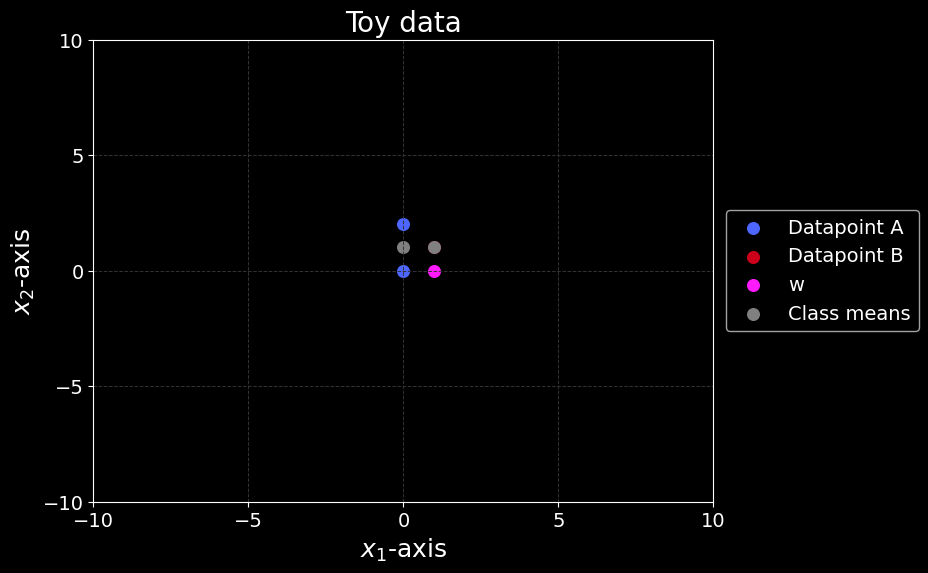

In [16]:
# Define two classes A and B 
A = np.array([[0,0],[0,2]])
B = np.array([[1,1]])


# NCC calculate w and beta
means = np.array([np.mean(A, axis=0), np.mean(B, axis=0)])
print(f"Class mean of A is {means[0]} and of B is {means[1]}")
w = np.array([means[1] - means[0]]) # Weight vector w
print(f"w is {w}")
beta = 0.5 * ((np.array(means[1]).T @ np.array(means[1])) - (np.array(means[0]).T @ np.array(means[0]))) # Offset beta
print(f"beta is {beta}")

# Calculate set of x that solve: w.T x - beta = 0
epsilon = 0.05
grid = np.array(np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))).T.reshape(-1, 2)
decision_boundary = grid[np.abs(grid @ w.T - beta).flatten() < epsilon]

# Plot and display
stylized_scatters([A,B, w,means],"Toy data","out.png",[nice_blue, nice_red,nice_purple, "grey"], ["Datapoint A", "Datapoint B", "w","Class means"])
display(IMG(filename="out.png"))

Class mean of A is [-5.  0.] and of B is [2.5 5. ]
w is [[7.5 5. ]]
beta is 3.125


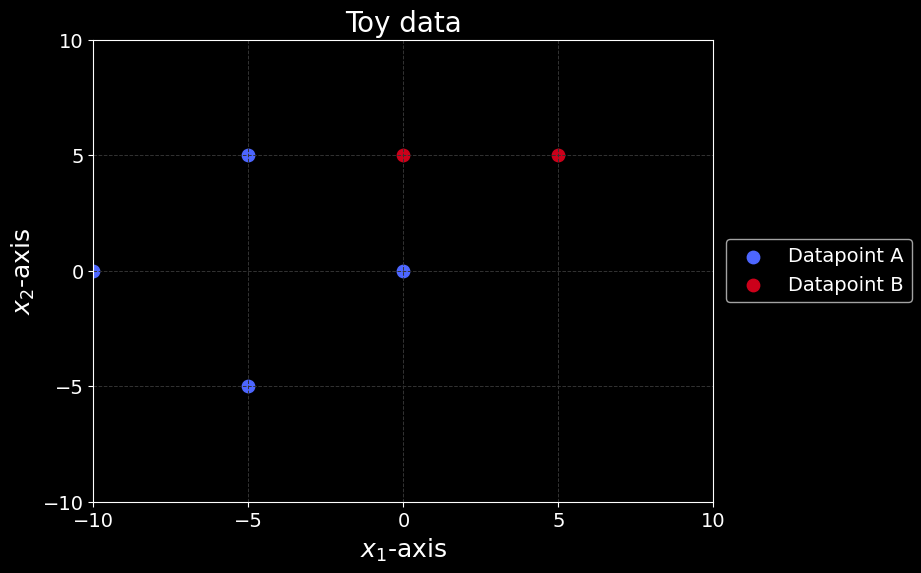

In [32]:
# Define two classes A and B 
A = np.array([[0,0],[-5,5],[-10,0],[-5,-5]])
B = np.array([[0,5],[5,5]])


# NCC calculate w and beta
means = np.array([np.mean(A, axis=0), np.mean(B, axis=0)])
print(f"Class mean of A is {means[0]} and of B is {means[1]}")
w = np.array([means[1] - means[0]]) # Weight vector w
print(f"w is {w}")
beta = 0.5 * ((np.array(means[1]).T @ np.array(means[1])) - (np.array(means[0]).T @ np.array(means[0]))) # Offset beta
print(f"beta is {beta}")

# Calculate set of x that solve: w.T x - beta = 0
epsilon = 0.05
grid = np.array(np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))).T.reshape(-1, 2)
decision_boundary = grid[np.abs(grid @ w.T - beta).flatten() < epsilon]

# Plot and display
stylized_scatters([A,B, w,means],"Toy data","scatter_A.png",[nice_blue, nice_red,nice_purple, "grey"], ["Datapoint A", "Datapoint B", "w","Class means"])

stylized_scatters([A,B],"Toy data","scatter_A.png",[nice_blue, nice_red], ["Datapoint A", "Datapoint B"])

display(IMG(filename="scatter_A.png"))

In [26]:
def stylized_scatters_homework(data_list, title, out_path, colors=nice_colors, labels = scatter_labels, dc = False):
    # Set up the figure
    plt.figure(figsize=(8, 6))
    plt.style.use('dark_background')  # Enable dark mode for aesthetics

    # Plot the data points
    for i in range (0, len(data_list)):
         x1_values = data_list[i][:, 0]
         x2_values = data_list[i][:, 1]  
         plt.scatter(x1_values, x2_values, s=70, color=colors[i], label=labels[i])

    # for NCC 
    if dc:
          plot_set(decision_boundary, "white", "Decision boundary")

    # Customize axis limits and labels
    plt.xlim(0, 5)
    plt.ylim(-2, 5)
    plt.xlabel("$x_1$-axis", fontsize=18)
    plt.ylabel("$x_2$-axis", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add title and legend
    plt.title(title, fontsize=20)
    plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=14, borderaxespad=0)

    # Add grid for visual clarity
    plt.grid(color=(0.2, 0.2, 0.2), linestyle='--', linewidth=0.7, zorder=1)

    # Save the figure to the specified folder/path
    plt.savefig(out_path, bbox_inches="tight")
    plt.close()  # Close to avoid display issues if called multiple times


NCC Homework

w is [[2. 1.]]
beta is 5.5


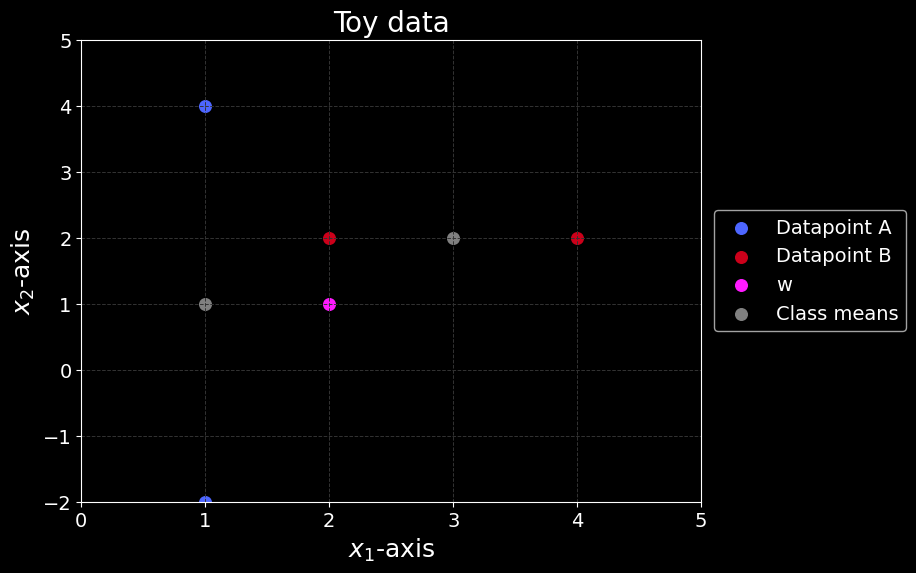

In [27]:
# Define two classes A and B 
A = np.array([[1,-2],[1,4]])
B = np.array([[4,2],[2,2]])

# NCC calculate w and beta
means = np.array([np.mean(A, axis=0), np.mean(B, axis=0)])
w = np.array([means[1] - means[0]]) # Weight vector w
print(f"w is {w}")
beta = 0.5 * ((np.array(means[1]).T @ np.array(means[1])) - (np.array(means[0]).T @ np.array(means[0]))) # Offset beta
print(f"beta is {beta}")

# Calculate set of x that solve: w.T x - beta = 0
epsilon = 0.05
grid = np.array(np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))).T.reshape(-1, 2)
decision_boundary = grid[np.abs(grid @ w.T - beta).flatten() < epsilon]

# Plot and display
stylized_scatters_homework([A,B, w,means],"Toy data","scatter_A.png",[nice_blue, nice_red,nice_purple, "grey"], ["Datapoint A", "Datapoint B", "w","Class means"])
display(IMG(filename="scatter_A.png"))

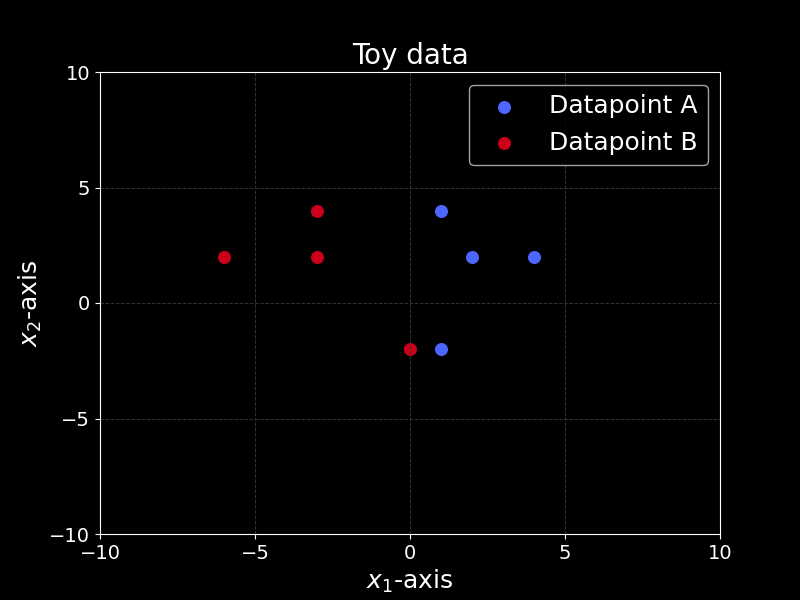

In [42]:
# Two classes A and B 
A = np.array([[1,-2],[1,4],[4,2],[2,2]])
B = np.array([[0,-2],[-3,4],[-6,2],[-3,2]])

stylized_scatters([A,B],"Toy data","scatter_A.png",[nice_blue, nice_red])
display(IMG(filename="scatter_A.png"))

In [ ]:
def stylized_scatters(title, out_path):
    # Set up the figure
    plt.figure(figsize=(8, 6))
    plt.style.use('dark_background')  # Enable dark mode for aesthetics

    plot_set(decision_boundary, "white", "Decision boundary")

    # Customize axis limits and labels
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel("$x_1$-axis", fontsize=18)
    plt.ylabel("$x_2$-axis", fontsize=18)
    plt.xticks([-10, -5, 0, 5, 10], fontsize=14)
    plt.yticks([-10, -5, 0, 5, 10], fontsize=14)

    # Add title and legend
    plt.title(title, fontsize=20)
    plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=14, borderaxespad=0)

    # Add grid for visual clarity
    plt.grid(color=(0.2, 0.2, 0.2), linestyle='--', linewidth=0.7, zorder=1)

    # Save the figure to the specified folder/path
    plt.savefig(out_path, bbox_inches="tight")
    plt.close()  # Close to avoid display issues if called multiple times

NCC

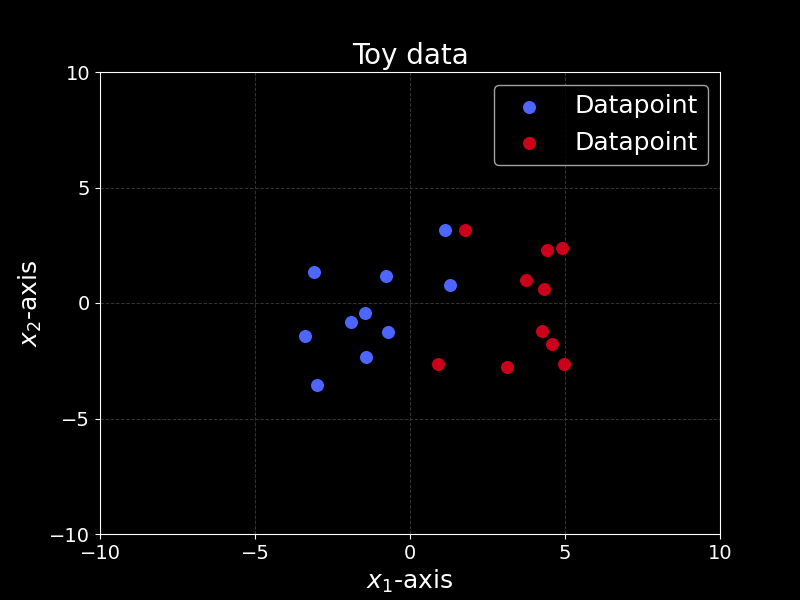

In [39]:
# Generate datapoints with scatter matrices
S_A = [[2, 1.2],
       [1.2, 5]]

S_B = [[4, 1.2],
       [1.2, 4]]

np.random.seed(42)
A = np.random.multivariate_normal([-1, 0], S_A, 10)
B = np.random.multivariate_normal([3, 0], S_B, 10)

stylized_scatters([A,B],"Toy data","scatter_A.png",[nice_blue, nice_red])
display(IMG(filename="scatter_A.png"))

In [ ]:


# Combine and label
X = np.vstack((A, B))
y = np.array([1]*10 + [-1]*10)

# Parameters
eta = 1
w = np.zeros(2)
b = 0
frames = []

# Plotting helper
def plot_decision_boundary(w, b, title):
    fig, ax = plt.subplots()
    colors = ['red' if label == -1 else 'blue' for label in y]

    # Scatter points
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='white')

    # Plot decision boundary
    x_vals = np.linspace(-10, 10, 100)
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        ax.plot(x_vals, y_vals, color='white',linestyle='--')
    else:
        ax.axvline(x=-b/w[0], color='white', linestyle='--')

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title(title)
    ax.grid(True)

    # Save to frame buffer and convert to PIL Image
    fig.canvas.draw()
    width, height = fig.canvas.get_width_height()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape((height, width, 3))
    image = Image.fromarray(image)
    frames.append(image)
    plt.close()

# Training loop
updates = 0
converged = False

while not converged and updates < 20:
    converged = True
    for i in range(len(X)):
        xi = X[i]
        yi = y[i]
        if yi * (np.dot(w, xi) + b) <= 0:
            w += eta * yi * xi
            b += eta * yi
            updates += 1
            converged = False
            plot_decision_boundary(w, b, f'Update {updates}: Misclassified x_{i+1}')

# Final state
plot_decision_boundary(w, b, 'Final Decision Boundary')

# Save GIF using Pillow
frames[0].save(
    'perceptron_learning.gif',
    save_all=True,
    append_images=frames[1:],
    duration=1000,  # 1000ms = 1 second per frame
    loop=0
)

print("GIF saved as 'perceptron_learning.gif'")

/var/folders/0q/699d2ftx6y1g94yr56ph98h40000gn/T/ipykernel_1509/3080852399.py:51: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape((height, width, 3))


GIF saved as 'perceptron_learning.gif'
